In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


In [2]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=1)

Using a total of 14640 tweets
Training sample size: 13214
Testing sample size: 1426


In [3]:
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)

def evaluate_trainer(trainer):
    classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    return {
        'classifier': classifier,
        'evaluation': evaluation,
        'trainer': trainer,
    }

Unigram features 1725
Bigram features:  1198


## Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier

evaluations = []
c_range = [1, 2, 5, 10]
for c in c_range: 
    trainer = {
    "name": "Linear SVC Classifier",
    "train": SklearnClassifier(LinearSVC(dual = False, # because number of samples > number of features,
                                         C = c,
                                         verbose = 3,
                                        )).train,
    }
    print("Training with c = ", c, "\n")
    evaluations.append(evaluate_trainer(trainer))



ValueError: x and y must have same first dimension

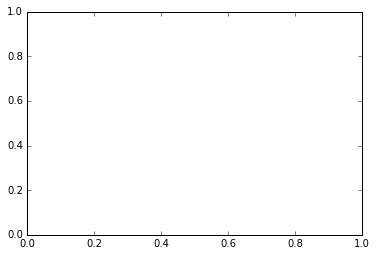

In [6]:
accuracies = [e['evaluation']['Accuracy'] for e in evaluations]
plt.plot(c_range, accuracies)
plt.xlabel("Error parameter value")
plt.ylabel("Accuracy")

# Concluzie

### Valoarea optima pentru cei mai apropiati  k vecini este 3.